<a href="https://colab.research.google.com/github/Rohan-1103/Machine_Learnt/blob/main/House_Price_SimpleLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
np.random.seed(42)
# n
n = 1000

In [3]:
# x
house_size = np.random.uniform(400, 3000, n)
# noise
noise = np.random.normal(0, 10, n)
# y
house_price = 0.05 * house_size + noise

In [4]:
df = pd.DataFrame({'house_size_sqft': house_size,
                   'house_price_lakhs': house_price})
df.head()

,house_size_sqft,house_price_lakhs
0,1373.804309,70.467225
1,2871.857197,130.239416
2,2303.184249,118.961191
3,1956.512059,103.931460
4,805.648465,45.880328


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
x = df[['house_size_sqft']]
y = df[['house_price_lakhs']]

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=3)

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x_train, y_train)

LinearRegression()

In [16]:
y_pred = lr.predict(x_test)

In [17]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price in Lakhs')

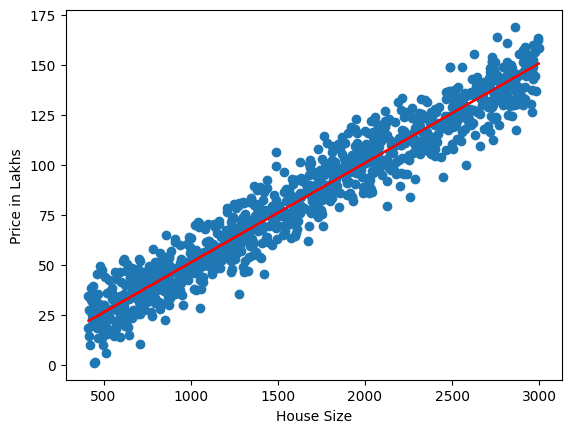

In [20]:
plt.scatter(df['house_size_sqft'],df['house_price_lakhs'])
plt.plot(x_train,lr.predict(x_train),color='red')
plt.xlabel('House Size')
plt.ylabel('Price in Lakhs')

In [13]:
# slope
lr.coef_

array([[0.049817]])

In [14]:
# intercept
lr.intercept_

array([1.21331321])

In [15]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [21]:
y_test

,house_price_lakhs
642,43.838714
762,68.916180
909,66.770963
199,128.987968
586,29.589187
...,...
164,50.204040
782,28.491475
575,117.527258
992,49.152374


In [22]:
print("MAE: ", mean_absolute_error(y_test, y_pred))

MAE:  7.867793216161042


In [23]:
print("MSE: ", mean_squared_error(y_test, y_pred))

MSE:  97.31427964835966


In [24]:
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  9.86480003083487


### 📊 R² Score (Coefficient of Determination)

* **Definition:**
  Measures how much variation in the **dependent variable (Y)** is explained by the **independent variable(s) (X)**.

* **Formula:**
  [
  R^2 = 1 - \frac{RSS}{TSS}
  ]

* **Interpretation:**

  * `R² = 0.80` → **80% of variation in Y is explained by X**
  * Remaining **20%** is due to other factors / noise

* **Value Range:**

  * `1` → Perfect fit
  * `0` → No explanatory power
  * `< 0` → Worse than predicting mean

* **Key Notes:**

  * Not accuracy
  * Does not imply causation
  * High R² ≠ good predictions always

* **SLR Fact:**
  [
  R^2 = (\text{correlation})^2
  ]

* **One-liner (Exam-ready):**

  > R² represents the proportion of variance in the dependent variable explained by the model.


In [25]:
r2 = r2_score(y_test, y_pred)
print("R2_score: ", r2)

R2_score:  0.9318730444034218
